*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

1H Results:
3H Results:


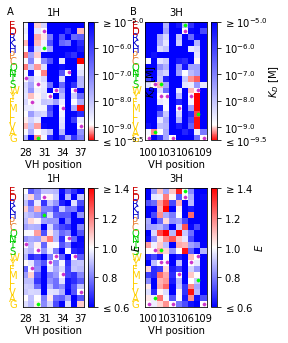

In [1]:
#!/usr/bin/env python
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdb
import pandas
from helper import *
#plt.close('all')
#plt.ion()
import warnings
warnings.filterwarnings('ignore')

from labeler import Labeler

[seq_hash, seq, seq_cdr] = make_Sequence_Hash(
    'data/CDR_library_July_5_2013_sequences.txt')

# Load data sets
rep1 = pandas.read_csv('data/replicate_1.csv')
rep2 = pandas.read_csv('data/replicate_2.csv')
rep3 = pandas.read_csv('data/replicate_3.csv')
all_reps = [rep1, rep2, rep3]
cdr1_wtseq = 'TFSDYWMNWV'
cdr3_wtseq = 'GSYYGMDYWG'
wt_seq = cdr1_wtseq+cdr3_wtseq

aff_fun = lambda x, ind: np.nanmean(np.log10(np.array(x['fit_KD'])[ind]))
exp_fun = lambda x, ind: np.nanmean((np.array(x['expression'])[ind]))
aas = np.array(['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
by_group = [5,0,17,7,9,10,4,19,18,15,16,11,13,1,12,6,8,14,2,3]
aa_map = {aas[int_val]:ii for ii, int_val in zip(range(20), by_group)}

def c_matrix(lib, map_fun):
    synonymous = np.where((lib['CDR1H_AA'] == cdr1_wtseq) & (lib['CDR3H_AA'] == cdr3_wtseq))
    wt_val = map_fun(lib, synonymous)
    usethis = []
    for ii in range(lib.shape[0]):
        temp = np.sum([c1 != wt1 for c1,wt1 in zip(lib['CDR1H_AA'][ii], cdr1_wtseq)])+np.sum([c3 != wt3 for c3,wt3 in zip(lib['CDR3H_AA'][ii], cdr3_wtseq)])
        usethis.append(temp==1)
    
    single = lib[usethis]
    
    out = []
    for ii in range(20):
        temp = []
        for jj in range(20):
            curr_seq = list(wt_seq)
            curr_seq[ii] = aas[jj]
            curr_seq = ''.join(curr_seq)
            usethis = [s1+s3 == curr_seq for s1, s3 in zip(lib['CDR1H_AA'], lib['CDR3H_AA'])]
            ind = np.where(usethis)[0]
            temp.append(map_fun(lib, ind))
        out.append(temp)
        
    out = np.array(out)
    practical_min = np.min(out[np.isfinite(out)])
    out[~np.isfinite(out)] = practical_min
    return out, wt_val

def heatmap_color(vals, zero, plottype):
    myrange = np.max(vals)-np.min(vals)
    zero = (zero - np.min(vals))/myrange
    if plottype == 'kd':
        cdict = {'red':   ((0.0,  0, 1),
                   (zero, 1, 1.0),
                   (1.0,  0, 0)),

                   'green': ((0.0, 0, 0),
                   (zero, 1, 1),
                   (1.0,  0, 0)),

                   'blue':  ((0.0,  0, 0),
                   (zero,  1, 1),
                    (1.0,  1.0, 1))}
    else:
        cdict = {'red':   ((0.0,  0, 0),
                   (zero, 1, 1.0),
                   (1.0,  1, 1)),

                   'green': ((0.0, 0, 0),
                   (zero, 1, 1),
                   (1.0,  0, 0)),

                   'blue':  ((0.0,  0, 1),
                   (zero,  1, 1),
                    (1.0,  0, 0))}        
                    
    return cdict



# This is the function that does all of the plotting
def plot_panel(ax, heatmap, zero, wtseq, pos, plottype, optseq_dict):
    
    if plottype=='me':
        vlim = [0.6,1.4]
    elif plottype=='kd':
        vlim = [-9.5, -5.0]

    plt.sca(ax)
    heatmap_array = np.array(heatmap.T[by_group])
    # Fix WT value to that passed as "zero"; this is set to an average
    # of the value for both CDR1 and CDR3 data sets
    for ii, aa in enumerate(wtseq):
         heatmap_array[aa_map[aa],ii] = zero

    temp_map = mpl.colors.LinearSegmentedColormap('my_colormap', \
        heatmap_color(vlim, zero, plottype),256)
    #cax=ax.imshow(heatmap_array, interpolation='nearest', \
    #              cmap=temp_map, vmin=vlim[0], vmax=vlim[1])
    cax = ax.pcolor(heatmap_array, cmap=temp_map, vmin=vlim[0], vmax=vlim[1])
    opt_pos = optseq_dict.keys()
    opt_aa = optseq_dict.values()
    for ii, aa in enumerate(wtseq):
        plt.scatter(ii+0.5, aa_map[aa]+0.5, \
            marker='o', c=[0.8,0.2,0.8], linewidths=0.5, s=10)

        # Plot OPT seq mutation if any occurs at position ii
        if pos[ii] in opt_pos:
            plt.scatter(ii+0.5,aa_map[optseq_dict[pos[ii]]]+0.5, \
                marker='o', c='Lime', linewidths=0.5, s=10)

    ax.set_yticks(np.linspace(0.5,19.5,20))
    ax.set_yticklabels([aas[ind] for ind in by_group], ha='left')
    ax.set_xlabel('VH position',labelpad=2)
    ax.set_xticks(np.linspace(0.5,9.5,4))
    ax.set_xticklabels([str(ii) for ii in pos[::3]])
    [tick.set_color(aa_colors2[ii]) for (ii,tick) in zip(aas[by_group],ax.yaxis.get_ticklabels())]
    ax.tick_params(axis='y', which='major', pad=10)

    fig = ax.get_figure()
    if plottype=='me':
        cbar = fig.colorbar(cax, orientation='vertical')
        ticks = np.linspace(start=vlim[0], stop=vlim[1],endpoint=True,num=5)
        ticklabels = [r'$%0.1f$'%t for t in ticks]
        if vlim[0]>0:
            ticklabels[0]= r'$\leq$' + ticklabels[0]
        else:
            ticklabels[0] = ticklabels[0]
        ticklabels[-1]= r'$\geq$' + ticklabels[-1]
        cbar.set_ticks(ticks)
        cbar.ax.set_yticklabels(ticklabels)
        cbar.set_label(r'$E$',labelpad=0)

    elif plottype=='kd':
        vlim = [-9.5,-5.0]
        ticks = [-9.5, -9.0, -8.0, -7.0, -6.0, -5.0] 
        ticklabels = [r'$10^{%0.1f}$'%t for t in ticks]
        ticklabels[0]= r'$\leq$' + ticklabels[0]
        ticklabels[-1]= r'$\geq$' + ticklabels[-1]
        cbar = fig.colorbar(cax, orientation='vertical', ticks=ticks)
        cbar.ax.set_yticklabels(ticklabels)
        cbar.ax.tick_params()
        cbar.set_label(r'$K_D$ [M]',labelpad=0)

    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 

    plt.xlim([0,10])
    plt.ylim([0,20])
    cbar.solids.set_rasterized(True)

    # Return heatmap_array for further analysis
    return heatmap_array

# Needed for proper focusing
plt.ion()
plt.close('all')

# Define colors
red = [0.8,0,0]
blue = [0,0,0.8]
gray = [0.4,0.4,0.4]
lightgray = [0.8,0.8,0.8,0.9]
black = [0.,0.,0.]

# Create figure with subplots and specified spacing
figsize=(3.42,4.5)
rows = 2
cols = 2    
fig, axes = plt.subplots(rows,cols,figsize=figsize)
plt.subplots_adjust(
    bottom = 0.07,
    top = 0.95,
    left = 0.07,
    right = 0.88,
    hspace = 0.4,
    wspace = 0.6)

# Make a labler to add labels to subplots
labeler = Labeler(xpad=.035,ypad=.015,fontsize=10)

wtseq1 = 'TFSDYWMNWV'
seq1pos = np.arange(28,38)
optseq1_dict = {30:'G',31:'H'}
wtseq2 = 'GSYYGMDYWG'
seq2pos = np.arange(100,110)
optseq2_dict = {101:'A',102:'S',106:'E',108:'L'}

# Get affinity zero
A_heatmaps = []
A_wts = []
for rep in all_reps:
    temp_hm, wt_temp = c_matrix(rep, aff_fun)
    A_heatmaps.append(temp_hm)
    A_wts.append(wt_temp)

A_heatmap = np.zeros(A_heatmaps[0].shape)
for ii in range(A_heatmap.shape[0]):
    for jj in range(A_heatmap.shape[1]):
        A_heatmap[ii,jj] = np.nanmedian([heatmap[ii,jj] for heatmap in A_heatmaps])

A_wt = np.median(A_wts)

# Affinity plot, lib1
ax = axes[0,0]
labeler.label_subplot(ax,'A')
A_1h_map = plot_panel(ax, A_heatmap[:10], A_wt, wtseq1, seq1pos, 'kd', optseq1_dict)
ax.set_title('1H', fontsize=mpl.rcParams['font.size'])

# Affinity plot, lib2
ax = axes[0,1]
labeler.label_subplot(ax,'B')
A_3h_map = plot_panel(ax, A_heatmap[10:], A_wt, wtseq2, seq2pos, 'kd', optseq2_dict)
ax.set_title('3H', fontsize=mpl.rcParams['font.size'])

# Get expression zero
E_heatmaps = []
E_wts = []
for rep in all_reps:
    temp_hm, wt_temp = c_matrix(rep, exp_fun)
    E_heatmaps.append(temp_hm)
    E_wts.append(wt_temp)

E_heatmap = np.zeros(E_heatmaps[0].shape)
for ii in range(E_heatmap.shape[0]):
    for jj in range(E_heatmap.shape[1]):
        E_heatmap[ii,jj] = np.nanmedian([heatmap[ii,jj] for heatmap in E_heatmaps])
E_wt = np.median(E_wts)

# Expression plot, lib1
print('1H Results:')
ax = axes[1,0]
#labeler.label_subplot(ax,'C')
E_1h_map = plot_panel(ax, E_heatmap[:10]/E_wt, 1, wtseq1, seq1pos, 'me', optseq1_dict)
ax.set_title('1H', fontsize=mpl.rcParams['font.size'])

# Expression plot, lib2
print('3H Results:')
ax = axes[1,1]
#labeler.label_subplot(ax,'D')
E_3h_map = plot_panel(ax, E_heatmap[10:]/E_wt, 1, wtseq2, seq2pos, 'me', optseq2_dict)
ax.set_title('3H', fontsize=mpl.rcParams['font.size'])

plt.show()
#plt.savefig('./pdfs/figure_5_landscape.pdf')
#plt.close()

A_1h_vals = A_1h_map[A_1h_map != A_wt]
A_3h_vals = A_3h_map[A_3h_map != A_wt]

E_1h_vals = E_1h_map[E_1h_map != 1]
E_3h_vals = E_3h_map[E_3h_map != 1]



In [20]:
A_wt

-8.911691176470715

In [2]:
#np.save('CDR1H.raw.heatmap.npy',A_heatmap[:10])
#np.save('CDR3H.raw.heatmap.npy',A_heatmap[10:])


<AxesSubplot:>

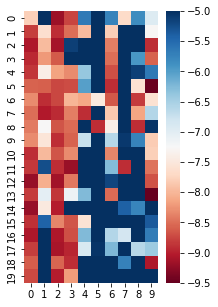

In [3]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(3,5))
sns.heatmap(A_1h_map,cmap='RdBu',ax=ax)

## Figure 3

directory = data/fcs1/
Empty DataFrame
Columns: []
Index: []
filename data/fcs1/040616_Sort_7_008.fcs
data Empty DataFrame
Columns: []
Index: []


KeyError: 'FSC-A'

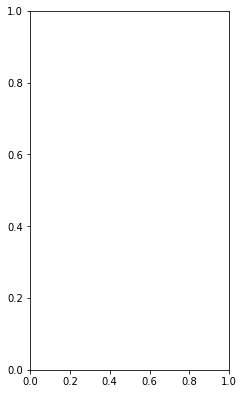

In [9]:
#!/usr/bin/env python
import os
import glob
import re
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib import gridspec
import math
import readfcs
import sys
import pandas
import pdb
from matplotlib import path
from labeler import Labeler


def count_reads(ax, lib, name, ylabel, vmax, vmin):
    # Always do this when working with a specific axes
    plt.sca(ax)

    all_N = np.zeros((12,4))
    label_x = ['0', '10^-9.5', '10^-9', '10^-8.5', '10^-8', '10^-7.5', '10^-7', '10^-6.5', '10^-6', '10^-5.5', '10^-5']
    for ii in range(len(label_x)):
        for jj in range(4):
            all_N[ii+1,jj] = int(lib['fluorescein'+label_x[ii]+'bin'+str(jj)].sum())
    
    for jj in range(4):
        all_N[0, jj] = int(lib['cmyc'+str(jj)].sum())
    
    
    #for NA, NE in zip(lib['A'], lib['E']):
    #    all_N[0] += NE
    #    all_N[1:] += NA

    
    im = ax.imshow(all_N, interpolation='nearest', cmap=mpl.cm.hot, norm=LogNorm(vmin=vmin, vmax=vmax))
    if ylabel:
        ax.set_ylabel('fluorescein [M]',labelpad=-10)
        ticks = range(12)
        labels = ['expression  ', '0'] + ['$10^{%1.1f}$'%x for x in np.arange(-9.5,-4.5,0.5)]
        ax.set_yticks(ticks)
        ax.set_yticklabels(labels)
    else:
        ax.set_yticks([])

    ax.set_xlabel('bin', labelpad=1)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(name,fontsize=mpl.rcParams['font.size'])

    return im

def count_cells(ax, datafile, name, ylabel, vmax, vmin):
    # Always do this when working with a specific axes
    plt.sca(ax)

    df = pandas.read_csv(datafile, delimiter='\t')
    all_N = np.array(df.iloc[1:,1:]).astype(float)

    im = ax.imshow(all_N, interpolation='nearest', cmap=mpl.cm.hot, norm=LogNorm(vmin=vmin, vmax=vmax))
    if ylabel:
        ax.set_ylabel('fluorescein [M]',labelpad=-10)
        ticks = range(12)
        labels = ['expression  ', '0'] + ['$10^{%1.1f}$'%x for x in np.arange(-9.5,-4.5,0.5)]
        ax.set_yticks(ticks)
        ax.set_yticklabels(labels)
    else:
        ax.set_yticks([])

    ax.set_xlabel('bin', labelpad=1)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(name,fontsize=mpl.rcParams['font.size'])

    return im

def in_gate(data, gate, name1, name2):
    x_data = data[name1]
    y_data = data[name2]
    x_data = [math.log10(max(x, 1e-10)) for x in x_data]
    y_data = [math.log10(max(y, 1e-10)) for y in y_data]
    poly = path.Path(gate)
    data = np.array([x_data, y_data])
    usethis = poly.contains_points(data.T)
    return usethis

def filter_fsc_ssc(data):
    print('data',data)
    sub_data = lambda indata, gate: indata[in_gate(indata, gate, 'FSC-A',b'SSC-A')]

    gate = [(4.33487278721722, 4.336993061421767),
    (4.004403501790057, 4.010254050207731),
    (3.5539963164652484, 3.324117555127123),
    (3.761167625032098, 3.10094159611305),
    (4.797024167866345, 4.285490917033903),
    (4.701406640835492, 4.474332113122737),
    (4.33487278721722, 4.336993061421767)]
    
    data = sub_data(data, gate)

    return data

def filter_ps(data):
    inv_data = lambda indata, gate: indata[[not ii for ii in in_gate(indata, gate, 'FITC-A', 'PE-A')]]
    sub_data = lambda indata, gate: indata[[ii for ii in in_gate(indata, gate, 'FITC-A', 'PE-A')]]
    
    gate = [(2.1356696655075864, 1.6073794088650155),
    (2.8528011182389887, 1.6588815532528791),
    (2.9802911542801267, 2.6717570595475224),
    (4.637661622814923, 4.491499494585357),
    (3.7133588615166713, 5.058023082851852),
    (1.7850720663944564, 5.040855701389231),
    (1.5141557398070378, 1.7790532234912266),
    (1.6575820303533182, 1.487207738626668),
    (2.1356696655075864, 1.6073794088650155)]
    
    inside = sub_data(data, gate)

    return inside

def plot_affinity(ax, data, gates):
    print(data)
    plt.sca(ax)
    colors = [(0,0,0),(1./3,0,0),(2./3,0,0),(1,0,0)]
    x = np.array(data['PE-A'])
    bins = np.logspace(gates[0][0],gates[3][1], np.round((gates[3][1]-gates[0][0])/0.01))
    n, bins= np.histogram(x, bins)
    norm = 1./np.max(n)
    for gate, color in zip(gates, colors):
        usethis = (x>10**gate[0])&(x<10**gate[1])
        if sum(usethis):
            bins = np.unique((x[usethis]))
            bins = np.logspace(gate[0],gate[1], np.round((gate[1]-gate[0])/0.01))
            N = np.sum(usethis)
            n, bins, patches = plt.hist(x[usethis], bins, histtype='stepfilled', color=color, lw=0, weights = np.ones(N)*float(norm))
                  
    ax.set_xlabel(r'PE signal [au]',labelpad=3)
    ax.set_yticks([])
    #ax.set_ylabel(name)
    ax.set_xscale('log') 
    ax.set_xlim([30,10**gates[-1,-1]])
    ax.set_ylim([0,1])

    # Print mean log x
    usethis = (x>10)&(x<1E5)

    #print '%s: %f'%(name,np.mean(np.log10(x[usethis])))


def plot_expression(ax, data, gates):
    plt.sca(ax)
    colors = [(0,0,0),(1./3,0,1./3),(2./3,0,2./3),(1,0,1)]
    x = np.array(data['Brilliant Violet 421-A'])
    bins = np.logspace(gates[0][0],gates[3][1], np.round((gates[3][1]-gates[0][0])/0.01))
    n, bins= np.histogram(x, bins)
    norm = 1./np.max(n)
    for gate, color in zip(gates, colors):
        usethis = (x>10**gate[0])&(x<10**gate[1])
        if sum(usethis):
            bins = np.unique((x[usethis]))
            bins = np.logspace(gate[0],gate[1], np.round((gate[1]-gate[0])/0.01))
            N = np.sum(usethis)
            n, bins, patches = plt.hist(x[usethis], bins, histtype='stepfilled', color=color, lw=0, weights = np.ones(N)*float(norm))
    
    ax.set_xlabel(r'BV signal [au]',labelpad=3)
    ax.set_yticks([])
    ax.set_xscale('log') 
    ax.set_xlim([30,10**gates[-1,-1]])
    ax.set_ylim([0,1])

def get_filenames(path):
    files = []
    for infile in glob.glob( os.path.join(path, '*.fcs') ):
        files.append(infile)
    return files

out_names = ['./pdfs/figure_3_procedure.pdf', './pdfs/figure_S2_rep2.pdf', './pdfs/figure_S3_rep3.pdf']
rep1 = pandas.read_csv('data/replicate_1.csv')
rep2 = pandas.read_csv('data/replicate_2.csv')
rep3 = pandas.read_csv('data/replicate_3.csv')
reps = [rep1, rep2, rep3]
sort_counts = ['data/sort_counts_16.4.15.txt', 'data/sort_counts_16.4.19.txt', 'data/sort_counts_16.4.21.txt']
directories = ['data/fcs1/','data/fcs2/','data/fcs3/']
bin_vals_16_4_15 = np.array([[1.4775788014225415, 2.245106453825187],
[2.2459637507318497, 2.9683536647430646],
[2.96837636283699, 3.6663288893768895],
[3.6675170811229103, np.log10(3e4)]])

#April 19 gates
bin_vals_16_4_19 = np.array([[1.4775788014225415, 2.245106453825187],
[2.2459637507318497, 2.85027248745035],
[2.8650326346119392, 3.474446976276228],
[3.4849588153986915, np.log10(1e5)]])

#April 21 gates
bin_vals_16_4_21 = np.array([[1.4775788014225415,2.200826012340419],
[2.216443456408671,2.8355123402887603],
[2.8355123402887603,3.474446976276228],
[3.4849588153986915,np.log10(3e4)]])

aff_gates = [bin_vals_16_4_15, bin_vals_16_4_19, bin_vals_16_4_21]

exp_gate_16_4_15 = np.array([[1.4917982838529373, 3.337952074987111],
[3.358239479285288, 3.80681652987833],
[3.8214685440936806, 4.272299750719853],
[4.275680984769549, 5.]])

exp_gate_16_4_19 = np.array([[1.4917982838529373, 2.5027872647121274],
[2.523074669010305, 3.352604089202462],
[3.3672561034178123, 4.242995722289152],
[4.246376956338848, 5.345278022490142]])

exp_gate_16_4_21 = np.array([[1.4917982838529373,3.411212146063864],
[3.416847536146691,3.80681652987833],
[3.8214685440936806,4.242995722289152],
[4.246376956338848,5]])

exp_gates = [exp_gate_16_4_15, exp_gate_16_4_19, exp_gate_16_4_21]

for out_name, rep, sort_name, rep_number, directory, aff_gate, exp_gate in zip(out_names, reps, sort_counts, range(1,4), directories, aff_gates, exp_gates):
    # Needed for proper focusing
    plt.ion()
    plt.close('all')

    # Create figure with subplots and specified spacing
    figsize=(3.5,5.6)
    rows=14
    cols=1
    col = 1
    fig, axes = plt.subplots(figsize=figsize)
    gs = gridspec.GridSpec(28, 2) 
    plt.subplots_adjust(
        bottom=0.06,
        top=0.95,
        left=0.17,
        right=0.96,
        wspace=0.6,
        hspace=0.0)

    # Make a labler to add labels to subplots
    labeler = Labeler(xpad=.13,ypad=.01,fontsize=10)

    # For CDR1H and CDR3H
    conc_labels = ['$0$'] + \
                  ['$10^{%1.1f}$'%x for x in np.arange(-9.5,-4.5,0.5)]

    file_labels = ['0M'] + \
                  ['10^%1.1fM'%x for x in np.arange(-9.5,-4.5,0.5)]

    #csv_name = 'out.csv'
    filenames = get_filenames(directory)
    print(f'directory = {directory}')
    names = [re.search('Sort_(\d+)', ii) for ii in filenames]
    condition = [n.group(1) for n in names]
        
    # Make plots
    for [filename, well] in zip(filenames, condition):
        well = int(well)
        library_data = readfcs.readfcs(filename)
        data = library_data.rename(columns={'SSC-W': 'SSC-H', 'SSC-H': 'SSC-W', 'FSC-W': 'FSC-H', 'FSC-H': 'FSC-W'})
        #print(data)
        #print(f'filename {filename}')
        data = filter_fsc_ssc(data) # filter by fsc and ssc
        maskeddata = filter_ps(data) # pre-sort filter based on FITC and PE signal
        # If expression bin, compute expression distribution
        if well == 1:
            ax = plt.subplot(gs[26:28,0])
            name = 'expression'
            plot_expression(ax, data, exp_gate)
            labeler.label_subplot(ax,'B')
            #plt.title('expression', \
            #    fontsize=mpl.rcParams['font.size'])
            #data.to_csv('./data/expression.csv')

        else:
            ind = (well-2)*2
            ax = plt.subplot(gs[ind:(ind+2),0])
            name = 'bin %d'%well
            plot_affinity(ax, maskeddata, aff_gate)

            conc_label = conc_labels[well-2]
            ax.set_ylabel(conc_label,rotation=0,ha='right', fontsize=mpl.rcParams['font.size'])
            #maskeddata.to_csv('./data/'+file_labels[well-2]+'.csv')
            if well!=12:
                ax.set_xlabel('')
                ax.set_xticks([])
            
            if well == 7:
                
                ax.text(-0.35,0.5,'fluorescein [M]', rotation=90,ha='right', fontsize=mpl.rcParams['font.size'],transform=ax.transAxes)
            if well==2:
                labeler.label_subplot(ax,'A')
                #plt.title('affinity', \
                #    fontsize=mpl.rcParams['font.size'])



        #plt.subplot(gs[12,0]).set_visible(False)
        #plt.subplot(gs[11,0]).set_visible(False)
    labeler = Labeler(xpad=.12,ypad=.01,fontsize=10)

    vmin = 1e3
    vmax = 1E7
    #panel C
    ax = plt.subplot(gs[0:12,1])
    im = count_cells(ax,sort_name,'cells', \
        ylabel=True, vmax=vmax, vmin=vmin)
    labeler.label_subplot(ax,'C')
    
    divider = make_axes_locatable(ax)
    width = axes_size.AxesY(ax, aspect=1/30.)
    pad = axes_size.Fraction(0.75, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    
    #cax = fig.add_axes([0.92, 0.5375, 0.025, 0.4125])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    #cbar.set_label(r'number of sorted cells')
    cbar.solids.set_rasterized(True)

    # Panel D
    ax = plt.subplot(gs[16:28,1])
    im = count_reads(ax, rep,'reads' ,ylabel=True, vmax=vmax, vmin=vmin)
    labeler.label_subplot(ax,'D')
    divider = make_axes_locatable(ax)
    width = axes_size.AxesY(ax, aspect=1/30.)
    pad = axes_size.Fraction(0.75, width)
    cax = divider.append_axes("right", size=width, pad=pad)
    
    #cax = fig.add_axes([0.92, 0.06, 0.025, 0.38])
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    #cbar.set_label(r'number of sequence reads')
    cbar.solids.set_rasterized(True)
    plt.show()
    plt.savefig(out_name)
    

In [10]:
import sys
#from StringIO import StringIO
from six import StringIO
import struct
import os

def fcsextract1(filename):
    """
    Attempts to parse an FCS (flow cytometry standard) file

    Parameters: filename
        filename: path to the FCS file

    Returns: (vars,events)
    	vars: a dictionary with the KEY/VALUE pairs found in the HEADER
    	this includes the standard '$ABC' style FCS variable as well as any 
    	custom variables added to the header by the machine or operator
	
    	events: an [N x D] matrix of the data (as a Python list of lists)
    	i.e. events[99][2] would be the value at the 3rd dimension
    	of the 100th event
    """
    fcs_file_name = filename

    fcs = open(fcs_file_name,'rb')
    header = fcs.read(58)
    version = header[0:6].strip()
    text_start = int(header[10:18].strip())
    text_end = int(header[18:26].strip())
    data_start = int(header[26:34].strip())
    data_end = int(header[34:42].strip())
    analysis_start = int(header[42:50].strip())
    analysis_end = int(header[50:58].strip())

    #print "Parsing TEXT segment"
    # read TEXT portion
    fcs.seek(text_start)
    delimeter = fcs.read(1)
    # First byte of the text portion defines the delimeter
    #print "delimeter:",delimeter
    text = fcs.read(text_end-text_start+1)

    #Variables in TEXT poriton are stored "key/value/key/value/key/value"
    keyvalarray = text.split(delimeter)
    fcs_vars = {}
    fcs_var_list = []
    # Iterate over every 2 consecutive elements of the array
    for k,v in zip(keyvalarray[::2],keyvalarray[1::2]):
        fcs_vars[k] = v
        fcs_var_list.append((k,v)) # Keep a list around so we can print them in order
    
    #print(fcs_var_list)
    #from pprint import pprint; pprint(fcs_var_list)
    if data_start == 0 and data_end == 0:
        data_start = int(fcs_vars[b'$DATASTART'])
        data_end = int(fcs_vars[b'$DATAEND'])

    num_dims = int(fcs_vars[b'$PAR'])
    #print "Number of dimensions:",num_dims

    num_events = int(fcs_vars[b'$TOT'])
    #print "Number of events:",num_events

    # Read DATA portion
    fcs.seek(data_start)
    #print "# of Data bytes",data_end-data_start+1
    data = fcs.read(data_end-data_start+1)

    # Determine data format
    datatype = fcs_vars[b'$DATATYPE']
    if datatype == b'F':
        datatype = 'f' # set proper data mode for struct module
        #print "Data stored as single-precision (32-bit) floating point numbers"
    elif datatype == 'D':
        datatype = 'd' # set proper data mode for struct module
        #print "Data stored as double-precision (64-bit) floating point numbers"
    else:
        assert False,"Error: Unrecognized $DATATYPE '%s'" % datatype
    #print(fcs_var_list)
    # Determine endianess
#     endian = fcs_vars[b'$BYTEORD']
#     if endian == "4,3,2,1":
#         endian = ">" # set proper data mode for struct module
#         #print "Big endian data format"
#     elif endian == "1,2,3,4":
#         #print "Little endian data format"
#         endian = "<" # set proper data mode for struct module
#     else:
#         assert False,"Error: This script can only read data encoded with $BYTEORD = 1,2,3,4 or 4,3,2,1"
    endian = ">"

    # Put data in StringIO so we can read bytes like a file    
    #print(data)
    #print(type(data))
    #return data
    #data = StringIO(data)
    data = io.BytesIO(data)

    #print "Parsing DATA segment"
    # Create format string based on endianeness and the specified data type
    format = endian + str(num_dims) + datatype
    datasize = struct.calcsize(format)
    #print "Data format:",format
    #print "Data size:",datasize
    events = []
    # Read and unpack all the events from the data
    for e in range(num_events):
        event = struct.unpack(format,data.read(datasize))
        events.append(event)
    
    fcs.close()
    return fcs_vars,events
    
def writefcs1(fcs_vars,events,fcs_file_name,delimiter=","):
    """
    Outputs FCS variables and data to files
    
    fcs_vars: the dictionary of key/value pairs from HEADER
    events: [N x D] matrix (list of lists) of event data in row-major form
    fcs_file_name: prefix for the output files
    delimiter: specifies separator between values in ASCII file output
        Generates a binary file if None
        
    Creates 3 files
    a) HEADER: fcs_file_name.txt
        the HEADER key/value pairs
    b) DATA: fcs_file_name.csv (or .bin for binary file)
        the raw data, one event per line
    c) INFO: fcs_file_name.info
        list of the dimension names and long-names ($PkN and $PkS)
    """
    num_dims = len(events[0])
    num_events = len(events)

    if delimiter is None:
        # Creates a binary file
        # First 4 bytes are an integer with the number of events
        # Next 4 bytes are an integer with the number of dimensions
        # Rest of the file is consecutive 32-bit floating point numbers
        # Data is stored such that consecutive floats are from the same event 
        # (i.e. an N x D matrix in row-major format)
        bin_file_name = fcs_file_name[:-4]+".bin"
        bin_file = open(bin_file_name,"wb")
        print("Writing DATA output file:",bin_file_name)
        bin_file.write(struct.pack("i",num_events))
        bin_file.write(struct.pack("i",num_dims))
        format = "%df" % num_dims
        for row in events:
            data = [float(x) for x in row]
            bin_file.write(struct.pack(format,*data))
    else:
        csv_file_name = fcs_file_name[:-4]+".csv"
        csv_file = open(csv_file_name,'w')
        print("Writing DATA output file:",csv_file_name)
        format = delimiter.join(["%0.2f"]*num_dims)
        for event in events:
            csv_file.write(format % event + "\n")
        csv_file.close()

    txt_file_name = fcs_file_name[:-4]+".txt"
    txt_file = open(txt_file_name,'w')
    print("Writing TEXT output file:",txt_file_name)
    for k,v in fcs_vars.items():
        txt_file.write("%s,%s\n" % (k,v))
    txt_file.close()

    info_file_name = fcs_file_name[:-4]+".info"
    print("Writing INFO output file:",info_file_name)
    info_file = open(info_file_name,'w')
    for i in range(num_dims):
        info_file.write("%s\t%s\n" % (fcs_vars["$P%dN"%(i+1)],fcs_vars.get("$P%dS"%(i+1),fcs_vars["$P%dN"%(i+1)])))     

if __name__ == '__main__':
    if len(sys.argv) == 2:
        fcs_file_name = sys.argv[1]
        delimiter = ","
    elif len(sys.argv) == 3:
        fcs_file_name = sys.argv[1]
        delimiter = {"0":",","1":" ","2":"\t","3":None}.get(sys.argv[2])
    else:
        print("Usage: python %s path [delimiter]\n" % sys.argv[0])
        print("    path: path to the fcs file or a directory")
        print("    if path is a directory, recursivel extracts all .fcs files\n")
        print("    delimiter: 0 = comma separated (default)")
        print("    delimiter: 1 = space separated")
        print("    delimiter: 2 = tab separated")
        print("    delimiter: 3 = generate binary file")
        sys.exit(1)
 
    files = [fcs_file_name]
    while(files):
        path = files.pop()
        if os.path.isdir(path):
            print("Directory:",path)
            new_files = [os.path.join(path,p) for p in os.listdir(path) if p.lower().endswith("fcs") or os.path.isdir(os.path.join(path,p))]
            files += new_files
            print("Adding files:",new_files)
        # It it's a file, process the file
        elif os.path.isfile(path):
            fcs_file_name = path
            print("\n\nProcessing:",fcs_file_name)
            fcs_vars,events = fcsextract(fcs_file_name)
            writefcs(fcs_vars,events,fcs_file_name,delimiter)


In [13]:
#readfcs.readfcs(filename)
fcs_vars,events = fcsextract1(filename)